# Example: Apple Inc. (AAPL) stock data using the `yfinance` library

Make sure you have the `yfinance` and `matplotlib` libraries installed in your environment before running this code. You can install them using the following commands:

[Note: `#` is used for commenting in Python. Delete this symbol if you want the code to be executed. Insert this symbol in from of the code to comment it out]
b

In [1]:
!pip install yfinance
!pip install matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------- ------ 786.4/949.2 kB 6.8 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------------- ------- 1.3/1.6 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.8 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=182c11d5eb97eb3f

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [2]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Download stock data
ticker = 'AAPL' # consider generalizing your code so it can be easily tweaked (for example, to analyze another stock)
stock_data = yf.download('AAPL', start='2016-01-01', end='2025-08-01')

C:\Users\Vitali\AppData\Local\Temp\ipykernel_7444\1617419719.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2016-01-01', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.803164,23.807683,23.046253,23.184078,270597600
2016-01-05,23.206673,23.916136,23.138891,23.893542,223164000
2016-01-06,22.752525,23.129853,22.564993,22.720893,273829600
2016-01-07,21.792269,22.623742,21.787751,22.296124,324377600
2016-01-08,21.907492,22.393271,21.862304,22.266743,283192000
...,...,...,...,...,...
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000


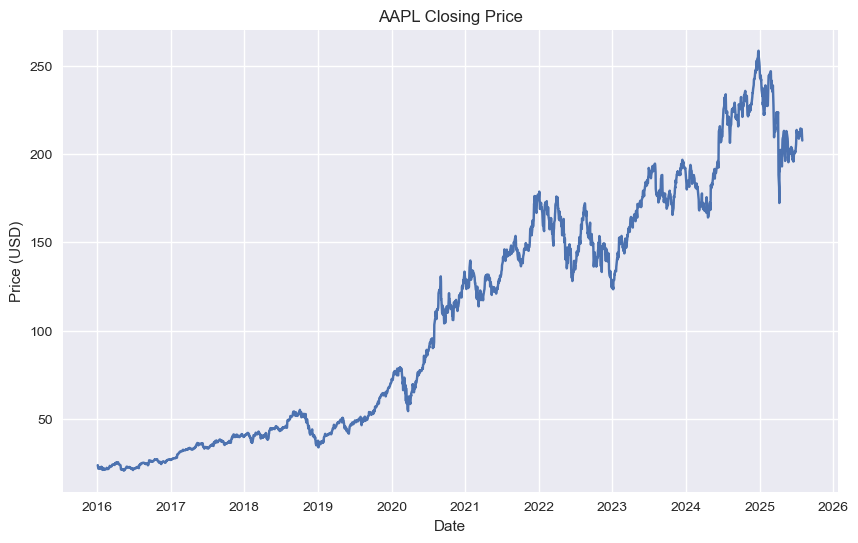

In [5]:
# Plot the closing price
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'])
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

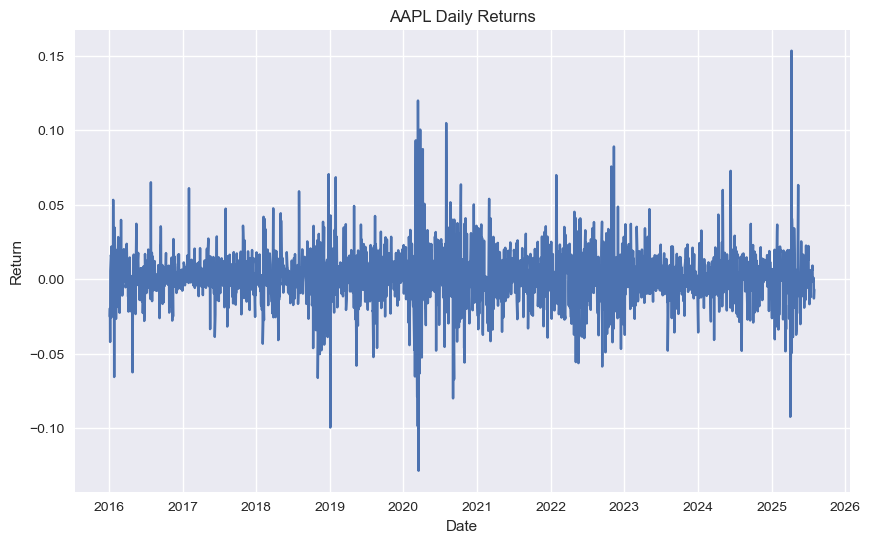

In [6]:
# Calculate daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Daily Return'])
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()

# Calculating Technical Indicators

Technical indicators are used to predict future price movements.

In [7]:
# Calculate the 20 and 50 days moving averages of the closing prices
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

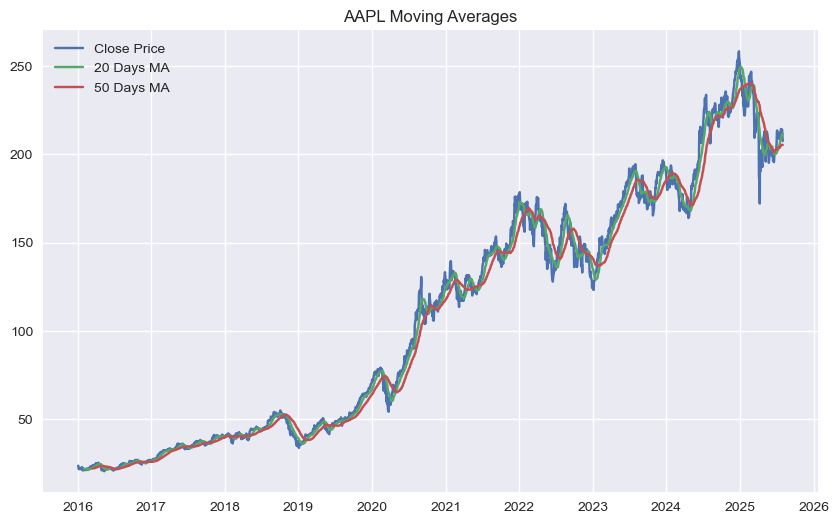

In [8]:
# Plot the moving averages
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA20'], label='20 Days MA')
plt.plot(stock_data['MA50'], label='50 Days MA')
plt.title(f"{ticker} Moving Averages")
plt.legend()
plt.show()

# Statistical Analysis

You can perform basic statistical analysis to get insights into the stok'’s performance.

In [9]:
# Descriptive statistics
stock_data.describe()

Price,Close,High,Low,Open,Volume,Daily Return,MA20,MA50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
count,2408.000000,2408.000000,2408.000000,2408.000000,2.408000e+03,2407.000000,2389.000000,2359.000000
mean,108.349046,109.433242,107.151141,108.244845,1.040214e+08,0.001070,108.280503,108.209585
std,68.667148,69.338069,67.914997,68.596398,5.802115e+07,0.018459,68.298589,67.778932
min,20.647459,20.951435,20.448619,20.569752,2.323470e+07,-0.128647,21.451669,21.872072
25%,41.114451,41.389549,40.773116,41.045726,6.501750e+07,-0.007358,40.914032,40.907316
50%,113.705833,115.789797,112.593270,114.249833,9.090835e+07,0.001097,113.750170,113.858166
75%,168.007969,169.633023,166.599437,168.017345,1.266751e+08,0.010129,166.711866,164.774422
max,258.396667,259.474086,257.010028,257.568678,5.334788e+08,0.153288,249.383421,240.170862


In [10]:
# Volatility calculation
stock_data['Log_Return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
volatility = stock_data['Log_Return'].std() * np.sqrt(252)  # Annualized volatility
print(f"The annualized volatility of {ticker} stock is: {volatility:.2%}")

The annualized volatility of AAPL stock is: 29.28%


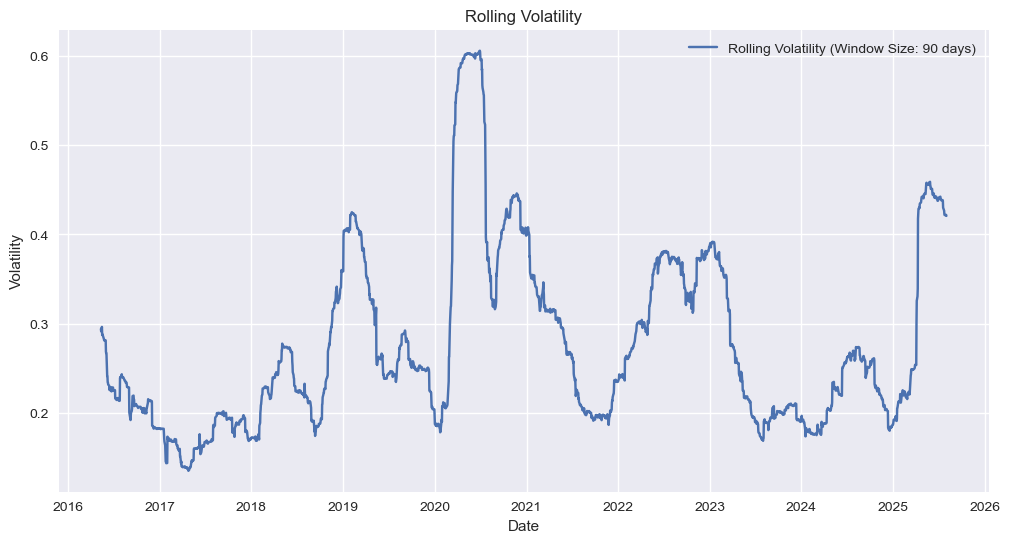

In [11]:
# Function to calculate rolling volatility
def calculate_rolling_volatility(data, window_size=90):
    rolling_volatility = data['Log_Return'].rolling(window=window_size).std() * np.sqrt(252)
    return rolling_volatility

# Calculate rolling volatility with a 90-day window
stock_data['Rolling_Volatility'] = calculate_rolling_volatility(stock_data, window_size=90)

# Plotting the rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Rolling_Volatility'], label=f'Rolling Volatility (Window Size: 90 days)')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Resources:

1. Introduction to ML using Python: https://github.com/justmarkham/scikit-learn-videos
2. Introduction to Python: https://github.com/VitaliAlexeev/PythonBootcampWeek1